In [94]:
#delTb=(1-Tcmb/Ts)*xH1*(1+delta)

import os
import numpy as np
import matplotlib.pyplot as plt
import glob

xH1_path=r'G:\CD_data_project'
Ts_path=r"F:\\JU INTERNSHIP\\T_spin_cubes\\"
del_path=r'G:\1+delta_files'

def read_dataH0(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    d=np.fromfile(f,dtype='float32')
    return d.reshape((600,600,600))
    
def read_data0(file):
    with open(file, 'rb') as f:
        d = np.fromfile(f, dtype='float32')
        return d.reshape((600,600,600))

def exTractz0(m,fx):    
    pattern = os.path.join(xH1_path, f"*_{m}*_{fx}*xhi.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    for f in files:        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)
        redshifts.append(z)
    return sorted(np.array(redshifts))
    
def delTb0(m,fx):
    rs=exTractz0(m,fx)
    mean_Tb=[]
       
    for z in rs:
        z_str=f"{z:.3f}"
        tsPf=os.path.join(Ts_path,f"{z_str}_{m}_{fx}_tspin.cbin")
        tsP_= glob.glob(tsPf)[0]
        
        xhiPf=os.path.join(xH1_path, f"{z_str}*_{m}*_{fx}*xhi.cbin")
        xhiP_= glob.glob(xhiPf)[0]
       
        deltaPf=os.path.join(del_path, f"{z_str}_1+delta_.bin")
        deltaP_ = glob.glob(deltaPf)[0]
        
        
        Ts=read_dataH0(tsP_).reshape((600,600,600))
        xH1=read_dataH0(xhiP_).reshape((600,600,600))
        IplusD=read_data0(deltaP_).reshape((600,600,600))

        Tcmb=2.725*(1+z)
        omegaM=0.310
        omegaB=0.049
        h=0.677
        #26.25mK is a scale factor
        #Tcmb/Ts is dimensionless as both in kelvin 
        delta_Tb=(0.027 * xH1 * (IplusD) * (1 - Tcmb / Ts) *
            np.sqrt((1 + z) / 10 * (0.15 / (omegaM * h**2))) *
            (omegaB * h**2 / 0.023))
        
        mean_Tb.append(np.mean(delta_Tb))
    
    return mean_Tb,rs

In [59]:
model,solar_mass="fx0.100E+00","Mmin0.100E+10"
dTb,z=delTb0(solar_mass,model)

In [61]:
model,solar_mass="fx0.100E+04","Mmin0.100E+10"
dTb1,z=delTb0(solar_mass,model)

In [63]:
model,solar_mass="fx0.464E+02","Mmin0.100E+10"
dTb2,z=delTb0(solar_mass,model)

In [76]:
model,solar_mass="fx0.100E+00","Mmin0.100E+11"
dTb3,z=delTb0(solar_mass,model)

In [77]:
model,solar_mass="fx0.100E+04","Mmin0.100E+11"
dTb4,z=delTb0(solar_mass,model)

In [96]:
model,solar_mass="fx0.464E+02","Mmin0.100E+11"
dTb5,z=delTb0(solar_mass,model)

In [100]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
print("ASSUMING Ts=Tk, \n")
xH1_path=r'G:\CD_data_project'
Tk_path=r'G:\CD_data_project'
del_path=r'G:\1+delta_files'

def read_dataH0(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    d=np.fromfile(f,dtype='float32')
    #print(f"{file} has data {d}")
    return d.reshape((600,600,600))
    
def read_data0(file):
    with open(file, 'rb') as f:
        d = np.fromfile(f, dtype='float32')
        return d.reshape((600,600,600))

def exTractz0(m,fx):    
    pattern = os.path.join(xH1_path, f"*_{m}*_{fx}*xhi.cbin")
    files = sorted(glob.glob(pattern))
    redshifts=[]
    for f in files:        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)
        redshifts.append(z)
    return sorted(np.array(redshifts))
    
def delTb0(m,fx):
    rs=exTractz0(m,fx)
    #print(f'rs is {rs}')
    mean_Tb=[]
       
    for z in rs:
        #print(f'z is {z}')
        z_str=f"{z:.3f}"
        tsPf=os.path.join(Tk_path,f"{z_str}*_{m}*_{fx}*tk.cbin")
       # print(f'tsPf {tsPf}')
        tsP_= glob.glob(tsPf)[0]
        #tsP=tsP_[0]
        xhiPf=os.path.join(xH1_path, f"{z_str}*_{m}*_{fx}*xhi.cbin")
        xhiP_= glob.glob(xhiPf)[0]
        #xhiP=xhiP_[0]
        deltaPf=os.path.join(del_path, f"{z_str}_1+delta_.bin")
        deltaP_ = glob.glob(deltaPf)[0]
        #deltaP=deltaP_[0]
        
        Ts=read_dataH0(tsP_)
        #print(f' meanTs is {np.mean(Ts)} for z {z}')
        xH1=read_dataH0(xhiP_)
        IplusD=read_data0(deltaP_)

        Tcmb=2.725*(1+z)
        omegaM=0.310
        omegaB=0.049
        h=0.677
        #26.25mK is a scale factor
        #Tcmb/Ts is dimensionless as both in kelvin 
        delta_Tb = (0.027 * xH1 * (IplusD) * (1 - Tcmb / Ts) *
            np.sqrt((1 + z) / 10 * (0.15 / (omegaM * h**2))) *
            (omegaB * h**2 / 0.023))

        
        mean_Tb.append(np.mean(delta_Tb))
    
    return mean_Tb,rs

ASSUMING Ts=Tk, 



In [82]:
model,solar_mass="fx0.100E+00","Mmin0.100E+10"
dTb6,z6=delTb0(solar_mass,model)

In [47]:
model,solar_mass="fx0.100E+04","Mmin0.100E+10"
dTb7,z6=delTb0(solar_mass,model)

In [48]:
model,solar_mass="fx0.464E+02","Mmin0.100E+10"
dTb8,z6=delTb0(solar_mass,model)

In [102]:
model,solar_mass="fx0.100E+00","Mmin0.100E+11"
dTb9,z6=delTb0(solar_mass,model)

In [103]:
model,solar_mass="fx0.100E+04","Mmin0.100E+11"
dTb10,z6=delTb0(solar_mass,model)

In [106]:
model,solar_mass="fx0.464E+02","Mmin0.100E+11"
dTb11,z6=delTb0(solar_mass,model)

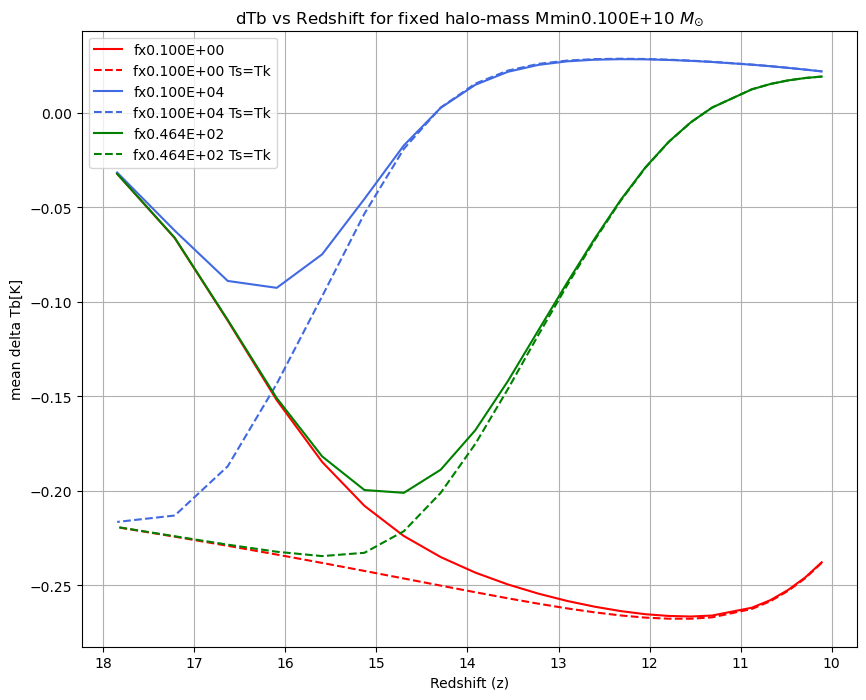

In [65]:
#fixed halo-mass="Mmin0.100E+10"
fig,ax=plt.subplots(figsize=(10,8))

ax.plot(z6,dTb,linestyle="-",color='red',label='fx0.100E+00')
ax.plot(z6,dTb6,linestyle="--",color='red',label='fx0.100E+00 Ts=Tk')

ax.plot(z6,dTb1,linestyle="-",color='royalblue',label='fx0.100E+04')
ax.plot(z6,dTb7,linestyle="--",color='royalblue',label='fx0.100E+04 Ts=Tk')

ax.plot(z6,dTb2,linestyle="-",color='green',label='fx0.464E+02')
ax.plot(z6,dTb8,linestyle="--",color='green',label='fx0.464E+02 Ts=Tk')

ax.set_title(f"dTb vs Redshift for fixed halo-mass {solar_mass} $M_{{\\odot}}$")
ax.set_xlabel("Redshift (z)")
ax.set_ylabel("mean delta Tb[K]")
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

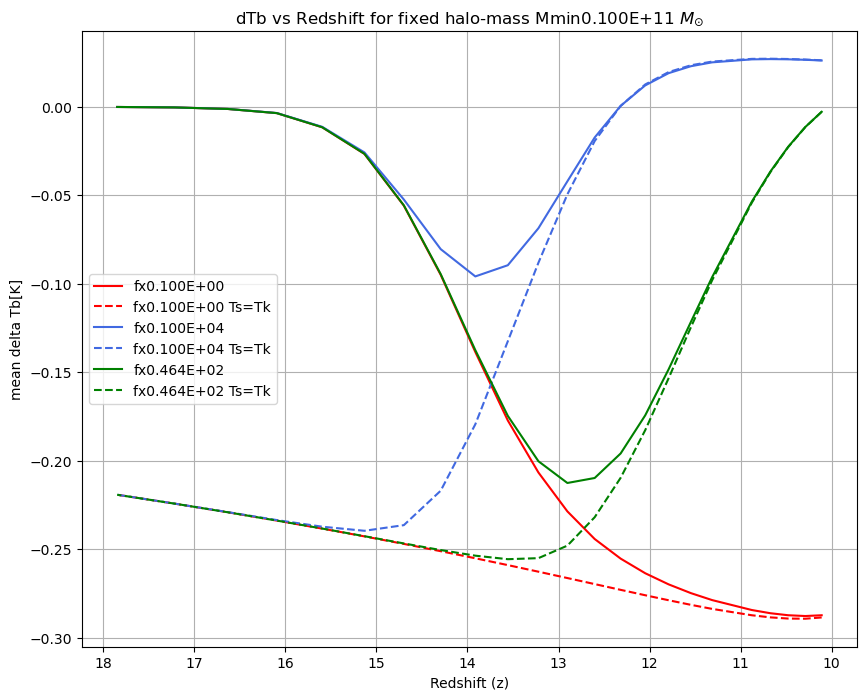

In [108]:
#fixed halo-mass="Mmin0.100E+10"
fig,ax=plt.subplots(figsize=(10,8))

ax.plot(z6,dTb3,linestyle="-",color='red',label='fx0.100E+00')
ax.plot(z6,dTb9,linestyle="--",color='red',label='fx0.100E+00 Ts=Tk')

ax.plot(z6,dTb4,linestyle="-",color='royalblue',label='fx0.100E+04')
ax.plot(z6,dTb10,linestyle="--",color='royalblue',label='fx0.100E+04 Ts=Tk')

ax.plot(z6,dTb5,linestyle="-",color='green',label='fx0.464E+02')
ax.plot(z6,dTb11,linestyle="--",color='green',label='fx0.464E+02 Ts=Tk')

ax.set_title(f"dTb vs Redshift for fixed halo-mass {solar_mass} $M_{{\\odot}}$")
ax.set_xlabel("Redshift (z)")
ax.set_ylabel("mean delta Tb[K]")
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()